In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'],axis=1,inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [12]:
target = df.Survived
inputs = df.drop('Survived',axis=1)

In [16]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [18]:
inputs = pd.concat([inputs,dummies],axis=1)
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False
3,1,female,35.0,53.1000,True,False
4,3,male,35.0,8.0500,False,True


In [20]:
inputs.drop('Sex', axis=1, inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [24]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [22]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [28]:
inputs['Age'] = inputs['Age'].fillna(inputs.Age.mean())
inputs.head(6)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,False,True
1,1,38.000000,71.2833,True,False
2,3,26.000000,7.9250,True,False
3,1,35.000000,53.1000,True,False
4,3,35.000000,8.0500,False,True
5,3,29.699118,8.4583,False,True


In [30]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2,random_state=42)

In [49]:
len(X_train)

712

In [51]:
len(X_test)

179

In [53]:
len(inputs)

891

In [55]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [57]:
model.fit(X_train, y_train)

GaussianNB()

In [59]:
model.score(X_test,y_test)

0.776536312849162

In [61]:
X_test[:10]

,Pclass,Age,Fare,female,male
709,3,29.699118,15.2458,False,True
439,2,31.000000,10.5000,False,True
840,3,20.000000,7.9250,False,True
720,2,6.000000,33.0000,True,False
39,3,14.000000,11.2417,True,False
290,1,26.000000,78.8500,True,False
300,3,29.699118,7.7500,True,False
333,3,16.000000,18.0000,False,True
208,3,16.000000,7.7500,True,False
136,1,19.000000,26.2833,True,False


In [63]:
y_test[:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

In [67]:
y_predicted = model.predict(X_test)
y_predicted
y_scores = model.predict_proba(X_test)
y_scores

array([[9.90672396e-01, 9.32760405e-03],
       [9.80056150e-01, 1.99438498e-02],
       [9.88847433e-01, 1.11525669e-02],
       [1.39909324e-02, 9.86009068e-01],
       [4.53692802e-02, 9.54630720e-01],
       [1.86327823e-03, 9.98136722e-01],
       [6.14072726e-02, 9.38592727e-01],
       [9.87794222e-01, 1.22057776e-02],
       [4.75771366e-02, 9.52422863e-01],
       [6.98674893e-03, 9.93013251e-01],
       [8.92913375e-01, 1.07086625e-01],
       [9.89897955e-01, 1.01020446e-02],
       [6.06673772e-02, 9.39332623e-01],
       [9.90443959e-01, 9.55604054e-03],
       [9.80353002e-01, 1.96469982e-02],
       [5.41147814e-03, 9.94588522e-01],
       [8.90233558e-01, 1.09766442e-01],
       [6.14344182e-02, 9.38565582e-01],
       [9.79469726e-01, 2.05302742e-02],
       [8.83180959e-01, 1.16819041e-01],
       [9.89740689e-01, 1.02593106e-02],
       [9.31639280e-01, 6.83607195e-02],
       [5.16778290e-02, 9.48322171e-01],
       [9.88923889e-01, 1.10761107e-02],
       [9.906683

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cr = classification_report(y_test,y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.74      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [71]:
cm = confusion_matrix(y_test,y_predicted)
print(cm)

[[86 19]
 [21 53]]


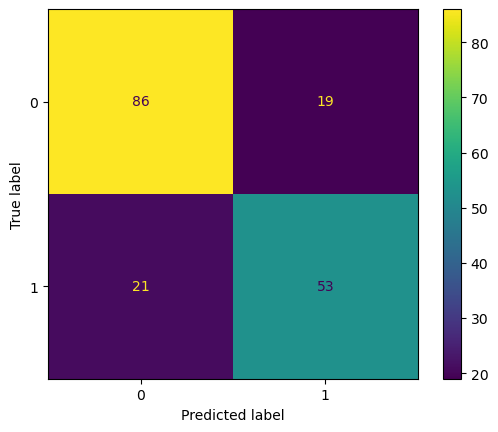

In [77]:
import matplotlib.pyplot as plt
cm_d =ConfusionMatrixDisplay(cm,display_labels=model.classes_)
cm_d.plot()